# Exercise 1
```In this exercise you will experience with pandas, matplotlib and numpy. This are main tools we are going to use later in course, and which are extremly useful in a variety of tasks. For each question, answer it in cells directly beneath it.```

```You are more than encourged to read relevant parts, mainly from ``` [pandas' API](https://pandas.pydata.org/pandas-docs/stable/reference/index.html)

```~ Ittai Haran```

## DataFrame basics

```A few of the fundamental routines for selecting, sorting, adding and aggregating data in DataFrames```

```import numpy and pandas```

In [0]:
import pandas as pd
import numpy as np

```Consider the following Python dictionary `data` and Python list `labels`:```

``` python
data = {'animal': ['cat', 'cat', 'snake', 'dog', 'dog', 'cat', 'snake', 'cat', 'dog', 'dog'],
        'age': [2.5, 3, 0.5, np.nan, 5, 2, 4.5, np.nan, 7, 3],
        'visits': [1, 3, 2, 3, 2, 3, 1, 1, 2, 1],
        'priority': ['yes', 'yes', 'no', 'yes', 'no', 'no', 'no', 'yes', 'no', 'no']}

labels = ['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j']
```

```Create a DataFrame `df` from this dictionary `data` which has the index `labels`.```

In [0]:
data = {'animal': ['cat', 'cat', 'snake', 'dog', 'dog', 'cat', 'snake', 'cat', 'dog', 'dog'],
        'age': [2.5, 3, 0.5, np.nan, 5, 2, 4.5, np.nan, 7, 3],
        'visits': [1, 3, 2, 3, 2, 3, 1, 1, 2, 1],
        'priority': ['yes', 'yes', 'no', 'yes', 'no', 'no', 'no', 'yes', 'no', 'no']}

labels = ['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j']

df = pd.DataFrame(data,labels)


```Display a summary of the basic information about this DataFrame and its data using the decribe and the info functions```

In [0]:
df.info()
df.describe()


<class 'pandas.core.frame.DataFrame'>
Index: 10 entries, a to j
Data columns (total 4 columns):
age         8 non-null float64
animal      10 non-null object
priority    10 non-null object
visits      10 non-null int64
dtypes: float64(1), int64(1), object(2)
memory usage: 400.0+ bytes


,age,visits
count,8.000000,10.000000
mean,3.437500,1.900000
std,2.007797,0.875595
min,0.500000,1.000000
25%,2.375000,1.000000
50%,3.000000,2.000000
75%,4.625000,2.750000
max,7.000000,3.000000


```Return the first 3 rows of the DataFrame `df`. Do it two times: use head and iloc```

In [0]:
print(df.head(3))
print(' ')
print(df.iloc[:3])

   age animal priority  visits
a  2.5    cat      yes       1
b  3.0    cat      yes       3
c  0.5  snake       no       2
 
   age animal priority  visits
a  2.5    cat      yes       1
b  3.0    cat      yes       3
c  0.5  snake       no       2


```Select just the 'animal' and 'age' columns from the DataFrame `df`.```

In [0]:
print(df.iloc[:,[True,True,False,False]])


   age animal
a  2.5    cat
b  3.0    cat
c  0.5  snake
d  NaN    dog
e  5.0    dog
f  2.0    cat
g  4.5  snake
h  NaN    cat
i  7.0    dog
j  3.0    dog


```Select the data in rows `[3, 4, 8]` *and* in columns `['animal', 'age']`.```

In [0]:
print(df.iloc[[2,3,7],[0,1]])

   age animal
c  0.5  snake
d  NaN    dog
h  NaN    cat


```Select only the rows where the number of visits is greater than 3. Pandas supports two useful APIs:
(df[boolean list/series]) returns the rows for which the value is True
(df[column] > num) returns a boolean series```

In [0]:
whenvis=df['visits']>=3
print(df[whenvis])

   age animal priority  visits
b  3.0    cat      yes       3
d  NaN    dog      yes       3
f  2.0    cat       no       3


```Select the rows where the age is missing, i.e. is `NaN`.```

In [0]:
missing= df['age']!=df['age']
df[missing]


,age,animal,priority,visits
d,NaN,dog,yes,3
h,NaN,cat,yes,1


```Select the rows where the animal is a cat *and* the age is less than 3. You can use logical operands: &, |, ~```

In [0]:
cat=df['animal']=='cat'
small=df['age']<3
df[cat&small]

,age,animal,priority,visits
a,2.5,cat,yes,1
f,2.0,cat,no,3


```Select the rows the age is between 2 and 4 (inclusive).```

In [0]:
small=df['age']<=4
big=df['age']>=2
df[small&big]

,age,animal,priority,visits
a,2.5,cat,yes,1
b,3.0,cat,yes,3
f,2.0,cat,no,3
j,3.0,dog,no,1


```Change the age in row 'f' to 1.5.```

In [0]:
df.set_value('f','age',1.5)


/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  """Entry point for launching an IPython kernel.


,age,animal,priority,visits
a,2.5,cat,yes,1
b,3.0,cat,yes,3
c,0.5,snake,no,2
d,NaN,dog,yes,3
e,5.0,dog,no,2
f,1.5,cat,no,3
g,4.5,snake,no,1
h,NaN,cat,yes,1
i,7.0,dog,no,2
j,3.0,dog,no,1


```Calculate the sum of all visits (the total number of visits). Do it twice: using built in pandas functions and using numpy```

In [0]:
print(df['visits'].sum())
print(np.sum(df['visits']))

19
19


```Calculate the mean age for each different animal in `df`.```

In [0]:
cat=df['animal']=='cat'
dog=df['animal']=='dog'
snake=df['animal']=='snake'
valid=df['age']==df['age']
print('dog mean age= ',df[dog&valid]['age'].mean())
print('cat mean age= ',df[cat&valid]['age'].mean())
print('snake mean age= ',df[snake&valid]['age'].mean())


('dog mean age= ', 5.0)
('cat mean age= ', 2.3333333333333335)
('snake mean age= ', 2.5)


```Append a new row 'k' to `df` with your choice of values for each column. Then delete that row to return the original DataFrame.```

In [0]:
data = {'animal': ['snake'],
        'age': [4.3],
        'visits': [ 1],
        'priority': ['yes']}

labels = ['k']
k=pd.DataFrame(data,labels)
df=df.append(k)
df=df.iloc[:-1,:]


```Count the number of each type of animal in `df`.```

In [0]:
cat=df['animal']=='cat'
dog=df['animal']=='dog'
snake=df['animal']=='snake'
print('num of dogs: ',len(df[dog]))
print('num of cats: ',len(df[cat]))
print('num of snakes: ',len(df[snake]))


('num of dogs: ', 4)
('num of cats: ', 4)
('num of snakes: ', 2)


```Sort `df` first by the values in the 'age' in *decending* order, then by the value in the 'visit' column in *ascending* order. You can use the sort_values function```

In [0]:
print(df.sort_values(by=['age','visits'],ascending=[False,True]))


   age animal priority  visits
i  7.0    dog       no       2
e  5.0    dog       no       2
g  4.5  snake       no       1
j  3.0    dog       no       1
b  3.0    cat      yes       3
a  2.5    cat      yes       1
f  1.5    cat       no       3
c  0.5  snake       no       2
h  NaN    cat      yes       1
d  NaN    dog      yes       3


```The 'priority' column contains the values 'yes' and 'no'. Replace this column with a column of boolean values: 'yes' should be `True` and 'no' should be `False`.```

```In the 'animal' column, change the 'snake' entries to 'python'.```

In [0]:
yes=df['priority']=='yes'
no=df['priority']=='no'
df.set_value(yes,'priority',True)
df.set_value(no,'priotiy',False)


/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:4: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  after removing the cwd from sys.path.


,age,animal,priority,visits,priotiy
a,2.5,cat,True,1,NaN
b,3.0,cat,True,3,NaN
c,0.5,snake,no,2,False
d,NaN,dog,True,3,NaN
e,5.0,dog,no,2,False
f,1.5,cat,no,3,False
g,4.5,snake,no,1,False
h,NaN,cat,True,1,NaN
i,7.0,dog,no,2,False
j,3.0,dog,no,1,False


In [0]:
snake=df['animal']=='snake'
df.at[snake,'animal']='python'


```For each animal type and each number of visits, find the mean age. In other words, each row is an animal, each column is a number of visits and the values are the mean ages (hint: use a pivot table).```

In [0]:
print(pd.pivot_table(df,values='age',index=['animal','visits'],aggfunc=np.mean))

                age
animal visits      
cat    1       2.50
       3       2.25
dog    1       3.00
       2       6.00
python 1       4.50
       2       0.50


```Now you will be asked to generate your own test data and manipulate it using functions you will have to create.```

```Create a dataframe with 1000 rows and 3 columns. The columns are to be the following:```
```
        - age: an integer, uniformly distributed between 20 to 65
        - skill: a float, normally distributed between 0 and 1, with expected value = 0.5 and standard deviation = 0.3
        - height: a float with 2 digits after the decimal point, between 1.5 to 2.0
```
```you might want to use numpy.random```

In [0]:
age=[int(np.random.uniform(20,66)) for i in range(1000)]
skill=[np.random.normal(0.5,0.3) for i in range(1000)]
height=[float(int(np.random.randint(150,200)))/100 for i in range(1000)]
data={'age':age,'skill':skill,'height':height}
index=[i for i in range(1000)]
df=pd.DataFrame(data,index)



```Add the dataframe a new columns, called salary, when:```
        <center>$salary = 1000\cdot((age^2)/1000 + 1.7\cdot skill + 0.4\cdot exp(-(height-1.7)^2)$<center>

In [0]:
salaries=1000*((df['age']**2)/1000+1.7*df['skill']+0.4*np.exp(-(df['height']-1.7)**2))
salary=pd.DataFrame({'salary':salaries},[i for i in range(1000)])
df['salary']=salaries

```Split the dataframe to groups by the age left digit and by the age. for each group compute:```
```
        - the number of rows
        - the mean salary
        - the maximum height     
```

```To do so, read about the groupby and agg functions is the ``` [pandas API](https://pandas.pydata.org/pandas-docs/stable/user_guide/groupby.html)

In [0]:
def asarot(ind):
  return int(df.loc[ind]["age"])/10

dd=df.groupby(asarot).agg({'skill':'count','salary': np.mean,'height':'max'})
dd=dd.rename(index=str, columns={'skill':'amount'})

dc=df.groupby('age').agg({'skill':'count','salary': np.mean,'height':'max'})
dc=dc.rename(index=str, columns={'skill':'amount'})



```Now split the dataframe to groups by age. For each group compute the mean salary, divided by the sum of heights.```

In [0]:

df2=df.groupby('age').agg({'salary':'mean','height':'sum'})
df2=df2['salary']/df2['height']
df2=pd.DataFrame(df2)
df2=df2.rename(columns={0:'wierd mean'})


```Add these lines to your code:```
```python
        import matplotlib.pyplot as plt
        %matplotlib inline
``` 
       
```Now try using the pd.DataFrame.plot function to show your data. Try also using pd.DataFrame.boxplot.```

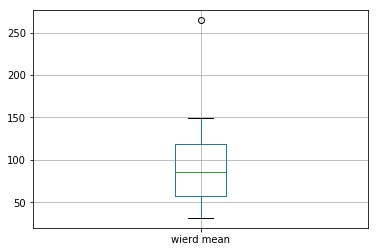

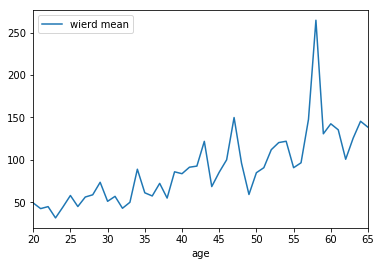

In [0]:
import matplotlib.pyplot as plt
%matplotlib inline

df2.boxplot(column=['wierd mean'])
df2.plot()


```Save the result as a csv```

In [0]:
df2.to_csv()

'age,wierd mean\n20,49.22450202570909\n21,42.557426746212585\n22,44.898454365816804\n23,31.588303786378\n24,44.516855290348396\n25,58.011947144387065\n26,45.003816346366165\n27,56.213690468393374\n28,58.82722382625051\n29,73.56963270940332\n30,51.153548262034846\n31,56.998271123750655\n32,42.96614403620184\n33,50.003156255349275\n34,88.95922546767707\n35,61.186042498349174\n36,57.46437202569181\n37,72.30473929307182\n38,54.966551797180145\n39,85.92877178033005\n40,83.6905751428321\n41,91.32956007937773\n42,92.6506285794446\n43,121.81708357808829\n44,68.52464794978435\n45,85.42503123588695\n46,100.06428705663645\n47,149.8693693171933\n48,96.10037549115205\n49,59.19957244021572\n50,84.86621437720221\n51,90.76885826496279\n52,111.99158644120313\n53,120.36004840642535\n54,121.92956495671413\n55,90.75751246502026\n56,96.55125163618295\n57,147.6781600402335\n58,264.5251252993126\n59,130.72824582132642\n60,142.48865390091007\n61,135.408123277451\n62,100.712239036556\n63,125.45106477212103\n64

## Working with real-life data

```read the csv file entitled house_prices_numeric.csv consider writing the following line of code:```
```python
pd.options.display.max_columns=50
```

In [0]:
from IPython.display import display, HTML
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [0]:
df = pd.read_csv('https://raw.githubusercontent.com/roee97/ds_course_ex1/master/house_prices_numeric.csv')
pd.options.display.max_columns=50


```In the following questions, print your answer if possible, draw a graph or visualize it in any other means. When drawing a graph, add a title to it. Answer the following questions (try using a single line of code for each):```
```
- What is oldest house in the dataset (YearBuilt)?
- What is the highest price (SalePrice) of houses built in that year?
- What is the mean area (LotArea) of houses?
- What is the 50-percentile of the area (LotArea) of houses?
- What is more common: having a fireplace (Fireplaces) in the house, or not having one?
- What is the mean price (SalePrice) of houses that have swimming pools (PoolArea)?
- How many houses were sold every year (YrSold)? Draw a graph using plt.plot or pandas.plot
- What is the distribution of the overall condition of the houses (OverallCond)? Use plt.hist or pandas.hist
- For every number of fireplaces in a house (Fireplaces), compute the mean price of a house, the mean age of the house (we are in 2019) and the count of distinct FullBath values
- Take only houses with MSSubClass > 60. Split into groups according to whether or not the MSSubClass is a multiple of 20. For each group compute the mean, max, min and standard deviation of OverallQual
```

('oldest house= ', 1872)
('highest price= ', 755000)
('mean area= ', 10516.828082191782)
('50% pecentile = ', 9478.5)
('is fireplace common= ', False)
('mean price= ', 288138.5714285714)
('years= ',         MoSold
YrSold        
2006       314
2007       329
2008       304
2009       338
2010       175)
('his= ', array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f1e2a50c3d0>]],
      dtype=object))


OverallQual                        
                           max min      mean       std
divided by 20                9   4  6.389908  1.111021
not multiple of 20          10   3  5.556180  1.193055

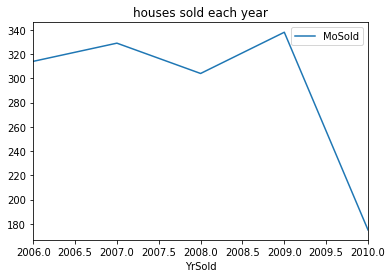

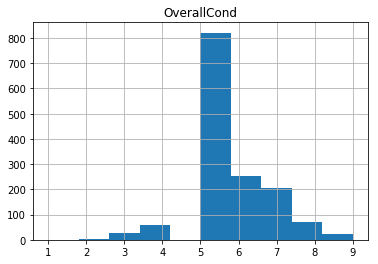

In [0]:
print("oldest house= ",df['YearBuilt'].min())
print("highest price= ",df['SalePrice'].max())
print("mean area= ",df['LotArea'].mean())
print("50% pecentile = ", df['LotArea'].describe()['50%'])
print("is fireplace common= ",df['Fireplaces'].sum()>df['Fireplaces'].count())
print("mean price= ",df[df.PoolArea>0]['SalePrice'].mean())
years=df.groupby('YrSold').agg({'MoSold':"count"})
print('years= ',years)
draw=years.plot()
draw.set_xlim(left=2006)
plt.title('houses sold each year')
print("his= ",df.hist('OverallCond'))
fireplaces=df.groupby('Fireplaces').agg({'SalePrice':'mean','YearBuilt':'mean','FullBath':'count'})
fireplaces['YearBuilt']=2019-fireplaces['YearBuilt']
fireplaces=fireplaces.rename(columns={'YearBuilt':'Age'})
fireplaces
st='invalid'
def mssing(ind):
  if df.loc[ind]["MSSubClass"]<=60:
    return 'invalid'
  if df.loc[ind]["MSSubClass"]%20==0:
    return "divided by 20"
  return "not multiple of 20"
  
mss=df.groupby(mssing,sort=True).agg({"OverallQual":['max','min','mean','std']})
mss=mss.iloc[[0,2],:]
mss

## Feature extraction

```Load the complete version of the houses table, entitled "house_prices_larger.csv"```

In [0]:
df = pd.read_csv('https://raw.githubusercontent.com/roee97/ds_course_ex1/master/house_prices_larger.csv')
df

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice,LotConfig
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,0,150,856,856,854,0,1710,1,0,2,1,3,1,8,0,2003.0,2,548,0,61,0,0,0,0,0,2,2008,208500,Inside
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,0,284,1262,1262,0,0,1262,0,1,2,0,3,1,6,1,1976.0,2,460,298,0,0,0,0,0,0,5,2007,181500,FR2
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,0,434,920,920,866,0,1786,1,0,2,1,3,1,6,1,2001.0,2,608,0,42,0,0,0,0,0,9,2008,223500,Inside
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,0,540,756,961,756,0,1717,1,0,1,0,3,1,7,1,1998.0,3,642,0,35,272,0,0,0,0,2,2006,140000,Corner
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,0,490,1145,1145,1053,0,2198,1,0,2,1,4,1,9,1,2000.0,3,836,192,84,0,0,0,0,0,12,2008,250000,FR2
5,6,50,85.0,14115,5,5,1993,1995,0.0,732,0,64,796,796,566,0,1362,1,0,1,1,1,1,5,0,1993.0,2,480,40,30,0,320,0,0,700,10,2009,143000,Inside
6,7,20,75.0,10084,8,5,2004,2005,186.0,1369,0,317,1686,1694,0,0,1694,1,0,2,0,3,1,7,1,2004.0,2,636,255,57,0,0,0,0,0,8,2007,307000,Inside
7,8,60,NaN,10382,7,6,1973,1973,240.0,859,32,216,1107,1107,983,0,2090,1,0,2,1,3,1,7,2,1973.0,2,484,235,204,228,0,0,0,350,11,2009,200000,Corner
8,9,50,51.0,6120,7,5,1931,1950,0.0,0,0,952,952,1022,752,0,1774,0,0,2,0,2,2,8,2,1931.0,2,468,90,0,205,0,0,0,0,4,2008,129900,Inside
9,10,190,50.0,7420,5,6,1939,1950,0.0,851,0,140,991,1077,0,0,1077,1,0,1,0,2,2,5,2,1939.0,1,205,0,4,0,0,0,0,0,1,2008,118000,Corner


```As you recall, the feature extraction process is done in order to let us describe the data in more "meaningful" manner. Add the following features to your dataframe:```
- ```LotArea in squared meters ( it's currently in units of squared feet)```
- ```1stFlrSF + 2ndFlrSF```
- ```GarageArea**0.5```
- ```LotArea / (BedroomAbvGr+1)```
- ```LotArea / (mean LotArea for houses built in that same year + 1e-5) - you might want to use``` [pandas merge function](https://www.google.com/search?q=pandas+merge&oq=pandas+merge&aqs=chrome..69i57l2j69i59l3j69i60.2080j0j9&sourceid=chrome&ie=UTF-8)
- ```Ranking of LotArea (largest house has 1, the second largest has 2 and so on)```
- ```One hot encoding of LotConfig - that is, add feature againts every value possible in LotConfig, which is 1 if the sample's LotConfig is this value and 0 otherwise (consider``` [pandas.get_dummies](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.get_dummies.html))

```make a list of the names of the features you created.```

In [0]:
meanlot=df.groupby('YearBuilt').agg({'LotArea':'mean'})
lotdivmean=[0 for i in range(len(df))]
for i in range(len(df)):
  year=df.iloc[i]['YearBuilt']
  lotdivmean[i]=df.iloc[i]['LotArea']/(10**-5+meanlot.loc[year]['LotArea'])
histog=df.groupby('LotArea').agg({'YearBuilt':'count'})
histog=histog.rename(columns={'YearBuilt':'amount'})
for i in range(1,len(histog)):
  histog.iloc[i]['amount']=histog.iloc[i]['amount']+histog.iloc[i-1]['amount']

  
data={'LotArea':df['LotArea'],
     'FlrSF':df['1stFlrSF']+df['2ndFlrSF'],
     'GarageArea':df['GarageArea']**0.5,
     'LotdivBed':df['LotArea']/(df['BedroomAbvGr']+1),
     'Lotdivmean':lotdivmean,
      
      
      }

db=pd.DataFrame(data)
indexes=[i for i in range(1,1+len(db))]
db=db.assign(index=indexes)
db=db.sort_values('LotArea',ascending=False)
db=db.assign(Ranking=indexes)
db=db.sort_values('index')
db=db.drop(columns='index')


hotencoding=pd.get_dummies(df['LotConfig'])

db=db.join(hotencoding)

names=['FlrSF','GarageArea','LotArea','LotdibBed','Loddivmean','Ranking','Corner','CulDSac','FR2','FR3','Inside']
db

,FlrSF,GarageArea,LotArea,LotdivBed,Lotdivmean,Ranking,Corner,CulDSac,FR2,FR3,Inside
0,1710,23.409400,8450,2112.500000,0.874874,949,0,0,0,0,1
1,1262,21.447611,9600,2400.000000,1.043942,693,0,0,1,0,0
2,1786,24.657656,11250,2812.500000,1.080951,408,0,0,0,0,1
3,1717,25.337719,9550,2387.500000,1.045441,716,1,0,0,0,0
4,2198,28.913665,14260,2852.000000,1.739272,151,0,0,1,0,0
5,1362,21.908902,14115,7057.500000,1.451537,161,0,0,0,0,1
6,1694,25.219040,10084,2521.000000,1.182699,608,0,0,0,0,1
7,2090,22.000000,10382,2595.500000,1.732013,553,1,0,0,0,0
8,1774,21.633308,6120,2040.000000,0.973799,1241,0,0,0,0,1
9,1077,14.317821,7420,2473.333333,0.888157,1112,1,0,0,0,0


## Simple linear model

```Next, we will train a simple linear model, as seen in class, to predict SalePrice. Use the features you computed. Create train and test segments, normalize the data (both the features and the target) and use a linear model. Make sure you don't somehow use the test data when training your model (or when normalizing your data).```

In [0]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error

In [0]:
max_saleprice=np.max(df['SalePrice'])
saleprices=df['SalePrice']/max_saleprice
print(type(saleprices))
L=train_test_split(db,saleprices)
dftrain=L[0]
dfTest=L[1]
sptrain=L[2]
spTest=L[3]
scaler = StandardScaler()
scaler.fit(dftrain)
dftrain=scaler.transform(dftrain)
scaler = StandardScaler()
scaler.fit(dfTest)
dfTest=scaler.transform(dfTest)


reg = LinearRegression(normalize=True).fit(dftrain, sptrain)

print(reg.score(dfTest,spTest))
print(mean_squared_error(sptrain,reg.predict(dftrain)))
print(mean_squared_error(spTest,reg.predict(dfTest)))

<class 'pandas.core.series.Series'>
0.6476510311118098
0.004514515066819485
0.0035720577738234628


/usr/local/lib/python2.7/dist-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:11: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:14: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  


```Next, we will add extra features: for any feature you computed earlier, add feature**2 and feature**3. Now use Ridge regression (regularized linear regression, as we discussed in class). Draw graphs of the loss computed on the train and on the validation as a function of the regularization parameter, for``` 1$\leq\alpha\leq$30. ```What regularization would it be best to take?```

In [0]:
from sklearn.linear_model import Ridge
df = pd.read_csv('https://raw.githubusercontent.com/roee97/ds_course_ex1/master/house_prices_special.csv')
df

,MSSubClass,LotFrontage,LotArea,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,60,65.0,8450,5,2003,2003,196.0,706,0,150,856,856,854,0,1710,1,0,2,1,3,1,8,0,2003.0,2,548,0,61,0,0,0,0,0,2,2008,208500
1,20,80.0,9600,8,1976,1976,0.0,978,0,284,1262,1262,0,0,1262,0,1,2,0,3,1,6,1,1976.0,2,460,298,0,0,0,0,0,0,5,2007,181500
2,60,68.0,11250,5,2001,2002,162.0,486,0,434,920,920,866,0,1786,1,0,2,1,3,1,6,1,2001.0,2,608,0,42,0,0,0,0,0,9,2008,223500
3,70,60.0,9550,5,1915,1970,0.0,216,0,540,756,961,756,0,1717,1,0,1,0,3,1,7,1,1998.0,3,642,0,35,272,0,0,0,0,2,2006,140000
4,60,84.0,14260,5,2000,2000,350.0,655,0,490,1145,1145,1053,0,2198,1,0,2,1,4,1,9,1,2000.0,3,836,192,84,0,0,0,0,0,12,2008,250000
5,50,85.0,14115,5,1993,1995,0.0,732,0,64,796,796,566,0,1362,1,0,1,1,1,1,5,0,1993.0,2,480,40,30,0,320,0,0,700,10,2009,143000
6,20,75.0,10084,5,2004,2005,186.0,1369,0,317,1686,1694,0,0,1694,1,0,2,0,3,1,7,1,2004.0,2,636,255,57,0,0,0,0,0,8,2007,307000
7,60,0.0,10382,6,1973,1973,240.0,859,32,216,1107,1107,983,0,2090,1,0,2,1,3,1,7,2,1973.0,2,484,235,204,228,0,0,0,350,11,2009,200000
8,50,51.0,6120,5,1931,1950,0.0,0,0,952,952,1022,752,0,1774,0,0,2,0,2,2,8,2,1931.0,2,468,90,0,205,0,0,0,0,4,2008,129900
9,190,50.0,7420,6,1939,1950,0.0,851,0,140,991,1077,0,0,1077,1,0,1,0,2,2,5,2,1939.0,1,205,0,4,0,0,0,0,0,1,2008,118000


In [0]:
meanlot=df.groupby('YearBuilt').agg({'LotArea':'mean'})
lotdivmean=[0 for i in range(len(df))]
for i in range(len(df)):
  year=df.iloc[i]['YearBuilt']
  lotdivmean[i]=df.iloc[i]['LotArea']/(10**-5+meanlot.loc[year]['LotArea'])
histog=df.groupby('LotArea').agg({'YearBuilt':'count'})
histog=histog.rename(columns={'YearBuilt':'amount'})
for i in range(1,len(histog)):
  histog.iloc[i]['amount']=histog.iloc[i]['amount']+histog.iloc[i-1]['amount']

  
data={'LotArea':df['LotArea'],
     'FlrSF':df['1stFlrSF']+df['2ndFlrSF'],
     'GarageArea':df['GarageArea']**0.5,
     'LotdivBed':df['LotArea']/(df['BedroomAbvGr']+1),
     'Lotdivmean':lotdivmean,
      
      
      }

db=pd.DataFrame(data)
indexes=[i for i in range(1,1+len(db))]
db=db.assign(index=indexes)
db=db.sort_values('LotArea',ascending=False)
db=db.assign(Ranking=indexes)
db=db.sort_values('index')
db=db.drop(columns='index')
dc=db*db
dd=db*dc
dc.columns=['FlrSf^2','GarageArea^2','LotArea^2','LotdivBet^2','Lotdivmean^2','Ranking^2']
dd.columns=['FlrSf^3','GarageArea^3','LotArea^3','LotdivBet^3','Lotdivmean^3','Ranking^3']
db=db.join(dc)
db=db.join(dd)


max_saleprice=np.max(df['SalePrice'])
saleprices=df['SalePrice']/max_saleprice
print(type(saleprices))
L=train_test_split(db,saleprices)
dftrain=L[0]
dfTest=L[1]
sptrain=L[2]
spTest=L[3]

scaler = StandardScaler()
scaler.fit(dftrain)
dftrain=scaler.transform(dftrain)
dfTest=scaler.transform(dfTest)
train_loss=[]
Test_loss=[]
N=31
for i in range(1,N):
  rig = Ridge(alpha=i).fit(dftrain, sptrain)
  train_loss.append(mean_squared_error(sptrain,rig.predict(dftrain)))
  Test_loss.append(mean_squared_error(spTest,rig.predict(dfTest)))
  


<class 'pandas.core.series.Series'>


/usr/local/lib/python2.7/dist-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:47: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:48: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.


Text(0.5,1,'Test_loss as function of alpha')

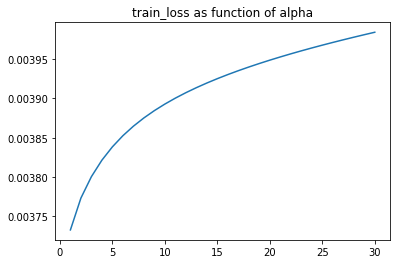

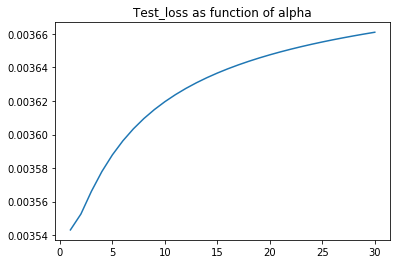

In [0]:

draw=plt.plot(range(1,N),train_loss)
plt.title('train_loss as function of alpha')
plt.figure()
draw2=plt.plot(range(1,N),Test_loss)
plt.title('Test_loss as function of alpha')

based on the graphs we would want apha to be as large as possible, though naturaly we didnt check alpha>30 and it might be worse afterwards and we see an asymptotic bond so anyway taking alpha>30 is not going to increas our precition by a lot so its best to take alpha=30


* *after trying with alpha>30(=50,250) and running several times we see that the difference in the resualt is much more influenced by our choice of the train and test data(chosen randomly with  each run) and not with alpha, the best alphas were:15,30,40,50,100 so i assume 40 is a pretty good alpha for our case*